In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

## 数据收集

In [2]:
#读取csv文件
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#网页下载数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response  = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
#读取tsv文件
image_predictions =  pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# 读取json
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [6]:
tweet_json = pd.DataFrame()

In [7]:
#DF添加数据
tweet_json['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## 评估

### 推特数据

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [11]:
twitter_archive.name.value_counts()

None           745
a              55 
Charlie        12 
Lucy           11 
Cooper         11 
Oliver         11 
Tucker         10 
Lola           10 
Penny          10 
Bo             9  
Winston        9  
the            8  
Sadie          8  
Bailey         7  
Toby           7  
Daisy          7  
Buddy          7  
an             7  
Stanley        6  
Jax            6  
Dave           6  
Oscar          6  
Koda           6  
Rusty          6  
Leo            6  
Bella          6  
Scout          6  
Jack           6  
Milo           6  
Gus            5  
              ..  
Beckham        1  
Arlo           1  
Rupert         1  
Pippin         1  
Pubert         1  
Dido           1  
Carll          1  
Dallas         1  
Buckley        1  
Rascal         1  
Kloey          1  
Napolean       1  
Deacon         1  
Lorelei        1  
Jarod          1  
Claude         1  
Rolf           1  
Daniel         1  
Dex            1  
Jeffri         1  
Boots          1  
Newt        

In [12]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

### 图像预测文件

In [16]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,Siberian_husky,0.304902,True,Eskimo_dog,0.155147,True,malamute,0.050942,True
1945,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True
1642,807621403335917568,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True


In [18]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
web_site                     19 
Cardigan                     19 
Eskimo_dog                   18 
beagle                       18 
Shetland_sheepdog            18 
teddy                        18 
Maltese_dog                  18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### API 

In [21]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [22]:
tweet_json.sample(5)

,tweet_id,retweet_count,favorite_count
788,773670353721753600,1489,5910
578,800443802682937345,5024,0
1342,704480331685040129,1193,3707
1281,708469915515297792,921,3343
195,854365224396361728,5123,19954


In [23]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### 质量
- 数据集不应包括转发的推特数据，删去以下空值较多的列:'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'
- 数据合并之后，删除没有jpg_url列为NAN的行
- source列为a href的url格式，提取出内容，重新编辑source列
- 分子列和分母列数值错误的行，删除极端值分子(1776),并查询分母不为10的行,创建新列为分子与分母的比值score
- 预测表格p1, p2, p3数据过多，只选择判断为狗可信度最高的品种以及其可信度
- 狗狗品种格式不一致，大小写与连接符混乱
- 狗狗name列错误，名字为‘a’明显是不可能的，重新获取、
- 修改各个列的数据形式，例如datatime，category等

### 清洁度
- 三个数据表可以根据tweet_id合并为一个数据集，进行分析
- doggo，floofer，pupper，puppo不应作为四列, 从text中提取作为一列

## 数据清理
### 清洁度整理

In [24]:
#创建副本
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

#### 定义
将三个数据集通过`pd.merge`方法，根据tweet_id左连接为一个表格df，并创建副本。

#### 代码

In [25]:
df = pd.merge(twitter_archive_clean, image_predictions_clean, 
             on='tweet_id', how='left')
df = pd.merge(df, tweet_json_clean, 
             on='tweet_id', how='left')
df_clean = df.copy()

#### 测试

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

#### 定义
doggo，floofer，pupper，puppo不应作为四列, 从text中提取作为一列。由于有些狗会存在多种‘status’，建立新列status储存狗的status
- 运用`str.findall()`从text中提取stage,返回列表
- 对返回的列表查重，运用`set()`
- apply()配合自定义函数方法修改status列，对多种status用"-"联结
- 删除doggo、flooer、puppo、pupper这四列

#### 代码

In [27]:
#返回字符串形式
df_clean['status'] = df_clean.text.str.lower().str.findall('(doggo|floofer|pupper|puppo)')

In [28]:
def status_(df):
    xs = sorted(list(set(df['status'])))
    if len(xs) > 1:
        xs = "-".join(xs)
    elif len(xs) == 1:
        xs = xs[0]
    else:
        xs = np.nan
    return xs

df_clean.status = df_clean.apply(status_, axis=1)

In [29]:
drop_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean.drop(drop_columns, axis=1, inplace=True)

#### 测试

In [30]:
df_clean.status.value_counts()

pupper           271
doggo            92 
puppo            36 
doggo-pupper     12 
floofer          9  
doggo-puppo      2  
doggo-floofer    1  
Name: status, dtype: int64

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        

### 整洁度

#### 定义
首先删除转发数据，retweeted_status_id列若不为空值，则代表是转发数据。检查tweet_id的重复，删除空值较多的列，以下五列并不需要

#### 代码

In [32]:
df_clean.tweet_id.duplicated().sum()

0

In [33]:
#删除转发的推特数据
df_clean = df_clean[pd.isnull(df_clean.retweeted_status_id)]

In [34]:
drop_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                'in_reply_to_status_id', 'in_reply_to_user_id']
df_clean.drop(drop_columns, axis=1, inplace=True)

#### 测试

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         2175 non-null float64
favorite_count        2175 non-

#### 定义
预测需要图像，删除jpg_url为空的行，理想情况下行数应相等

#### 代码

In [36]:
df_clean = df_clean.dropna(subset=['jpg_url'])

#### 测试

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-

#### 定义
source中a href是html格式，观察很麻烦。因此通过正则表达式，并且用`str.extract`提出标签内的内容。

#### 代码

In [38]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [39]:
df_clean['source'] = df_clean['source'].str.extract('<a.*?>(.*?)</a>', expand=True)

#### 测试

In [40]:
df_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

In [41]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,status
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,8842.0,39492.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6480.0,33786.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,4301.0,25445.0,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925.0,42863.0,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721.0,41016.0,NaN


#### 定义
- 调整分子分母，检查分母不等于10的行
- 分母为int，分子为float形式，通过正则表达式找到text中的浮点数值
- 检查观察到的异常值，即分子为1776和420的数据，或者非常规值
- 创建新列score为分子分母的比值
#### 代码

In [42]:
df_clean.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8       95 
7       52 
14      35 
5       33 
6       32 
3       19 
4       16 
2       9  
1       5  
0       2  
420     1  
24      1  
1776    1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
204     1  
26      1  
Name: rating_numerator, dtype: int64

In [43]:
df_clean.rating_denominator.value_counts()

10     1976
50     3   
80     2   
11     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [44]:
#找出分母不为10的数据
df_clean.loc[df_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [45]:
#修改其中观察到的5个数据评分，其中516行810984652412424192的数据舍去，分母小于10，24/7的数值不可取
df_clean.loc[df_clean.tweet_id == 740373189193256964,'rating_numerator'] = 14
df_clean.loc[df_clean.tweet_id == 740373189193256964,'rating_denominator'] = 10

df_clean.loc[df_clean.tweet_id == 722974582966214656,'rating_numerator'] = 13
df_clean.loc[df_clean.tweet_id == 722974582966214656,'rating_denominator'] = 10

df_clean.loc[df_clean.tweet_id == 716439118184652801,'rating_numerator'] = 11
df_clean.loc[df_clean.tweet_id == 716439118184652801,'rating_denominator'] = 10

df_clean.loc[df_clean.tweet_id == 682962037429899265,'rating_numerator'] = 10
df_clean.loc[df_clean.tweet_id == 682962037429899265,'rating_denominator'] = 10

df_clean.loc[df_clean.tweet_id == 666287406224695296,'rating_numerator'] = 9
df_clean.loc[df_clean.tweet_id == 666287406224695296,'rating_denominator'] = 10

In [46]:
#提取text中的浮点数
df_clean[df_clean.text.str.contains('\d+\.\d+\/\d+')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,status
45,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10336.0,46741.0,NaN
695,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,...,True,Persian_cat,0.122978,False,chow,0.102654,True,7033.0,20221.0,NaN
763,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1867.0,7292.0,pupper
1712,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,542.0,1868.0,pupper


In [47]:
#修改分子
df_clean.loc[df_clean.tweet_id == 883482846933004288,'rating_numerator'] = 13.5

df_clean.loc[df_clean.tweet_id == 786709082849828864,'rating_numerator'] = 9.75

df_clean.loc[df_clean.tweet_id == 778027034220126208,'rating_numerator'] = 11.27

df_clean.loc[df_clean.tweet_id == 680494726643068929,'rating_numerator'] = 11.26

In [48]:
df_clean.query('rating_numerator == 1776 | rating_numerator == 420')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,status
979,749981277374128128,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2769.0,5594.0,NaN
2074,670842764863651840,2015-11-29 05:52:33 +0000,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,...,False,accordion,0.094075,False,drumstick,0.061113,False,9509.0,25673.0,NaN


In [49]:
#舍去特殊值
df_clean = df_clean.query('rating_numerator != 1776 & tweet_id != 810984652412424192 & rating_numerator != 420')

In [50]:
df_clean['score'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

#### 测试

In [51]:
df_clean.rating_numerator.value_counts()

12.00     450
10.00     420
11.00     397
13.00     262
9.00      151
8.00      95 
7.00      51 
14.00     36 
6.00      32 
5.00      32 
3.00      19 
4.00      15 
2.00      9  
1.00      4  
0.00      2  
45.00     1  
84.00     1  
99.00     1  
11.27     1  
13.50     1  
165.00    1  
11.26     1  
9.75      1  
80.00     1  
88.00     1  
144.00    1  
44.00     1  
60.00     1  
121.00    1  
204.00    1  
143.00    1  
Name: rating_numerator, dtype: int64

In [52]:
df_clean.rating_denominator.value_counts()

10     1979
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int64
name                  1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null object
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null object
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null object
retweet_count         1991 non-null float64
favorite_count        1991 no

In [54]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,status,score
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,bagel,0.085851,False,banana,0.076110,False,8842.0,39492.0,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,Pekinese,0.090647,True,papillon,0.068957,True,6480.0,33786.0,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,malamute,0.078253,True,kelpie,0.031379,True,4301.0,25445.0,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925.0,42863.0,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721.0,41016.0,NaN,1.2


#### 定义
筛选预测的数据，变为两列breed以及p_conf。选取检测结果为狗的可信度最高的狗的品种，以及其相应的数值，若前三可信度都不是狗狗，则品种定义为Unknow。定义函数，运用`pd.apply`方法调用。最后在删除p1,p2,p3以及其相关数据。

#### 代码

In [55]:
breed =[]
p_conf = []
def breed_class(df):
    if df['p1_dog']:
        breed.append(df['p1'])
        p_conf.append(df['p1_conf'])
    elif df['p2_dog']:
        breed.append(df['p2'])
        p_conf.append(df['p2_conf'])
    elif df['p3_dog']:
        breed.append(df['p3'])
        p_conf.append(df['p3_conf'])
    else:
        breed.append(np.nan)
        p_conf.append(0)

df_clean.apply(breed_class, axis=1)
df_clean['breed'] = breed
df_clean['p_conf'] = p_conf
      

In [56]:
drop_columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_clean = df_clean.drop(drop_columns, axis=1)

#### 测试

In [57]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,status,score,breed,p_conf
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8842.0,39492.0,NaN,1.3,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6480.0,33786.0,NaN,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4301.0,25445.0,NaN,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8925.0,42863.0,NaN,1.3,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9721.0,41016.0,NaN,1.2,basset,0.555712


In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int64
name                  1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null float64
retweet_count         1991 non-null float64
favorite_count        1991 non-null float64
status                342 non-null object
score                 1991 non-null float64
breed                 1685 non-null object
p_conf                1991 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 264.4+ KB


#### 定义
统一breed格式，均设置为首字母大写，连接符号设置为' '。

#### 代码

In [59]:
df_clean.breed.value_counts()

golden_retriever                  157
Labrador_retriever                108
Pembroke                          95 
Chihuahua                         91 
pug                               62 
toy_poodle                        51 
chow                              48 
Pomeranian                        42 
Samoyed                           42 
malamute                          33 
Chesapeake_Bay_retriever          31 
French_bulldog                    31 
cocker_spaniel                    30 
miniature_pinscher                25 
Eskimo_dog                        22 
Cardigan                          21 
Staffordshire_bullterrier         21 
German_shepherd                   21 
Siberian_husky                    20 
Shih-Tzu                          20 
beagle                            20 
Rottweiler                        19 
Shetland_sheepdog                 19 
Maltese_dog                       19 
kuvasz                            18 
Lakeland_terrier                  18 
Italian_grey

In [60]:
df_clean['breed'] = df_clean['breed'].str.title()
df_clean['breed'] = df_clean['breed'].str.replace("_", " ")
df_clean['breed'] = df_clean['breed'].str.replace("-", " ")

#### 测试

In [61]:
df_clean.breed.value_counts()

Golden Retriever                  157
Labrador Retriever                108
Pembroke                          95 
Chihuahua                         91 
Pug                               62 
Toy Poodle                        51 
Chow                              48 
Pomeranian                        42 
Samoyed                           42 
Malamute                          33 
French Bulldog                    31 
Chesapeake Bay Retriever          31 
Cocker Spaniel                    30 
Miniature Pinscher                25 
Eskimo Dog                        22 
Staffordshire Bullterrier         21 
Cardigan                          21 
German Shepherd                   21 
Siberian Husky                    20 
Shih Tzu                          20 
Beagle                            20 
Maltese Dog                       19 
Shetland Sheepdog                 19 
Rottweiler                        19 
Kuvasz                            18 
Lakeland Terrier                  18 
Basset      

#### 定义
a不太可能作为一个宠物的名字，并且出现的评率很高。根据`sample()`随机观察几次text中的数据，得出了几个规律，并其用正则表达式搜索。此处参考[论坛](http://discussions.youdaxue.com/t/topic/54878)

#### 代码

In [62]:
df_clean.name.value_counts()

None           545
a              55 
Charlie        11 
Oliver         10 
Cooper         10 
Lucy           10 
Tucker         9  
Penny          9  
Winston        8  
Sadie          8  
Toby           7  
the            7  
Daisy          7  
Lola           7  
Stanley        6  
Bo             6  
Bella          6  
an             6  
Koda           6  
Jax            6  
Rusty          5  
Bailey         5  
Chester        5  
Buddy          5  
Scout          5  
Leo            5  
Dave           5  
Milo           5  
Louis          5  
Oscar          5  
              ..  
Beckham        1  
Arlo           1  
Rupert         1  
Logan          1  
Carll          1  
Jeffri         1  
Pippin         1  
infuriating    1  
Kloey          1  
Napolean       1  
Deacon         1  
Lorelei        1  
Jarod          1  
Claude         1  
Rolf           1  
Rubio          1  
Daniel         1  
Buckley        1  
Dex            1  
Boots          1  
Newt           1  
Stefan      

In [63]:
df_clean.sample(20)[['text', 'name']]

,text,name
2139,Awesome dog here. Not sure where it is tho. Spectacular camouflage. Enjoys leaves. Not very soft. 5/10 still petable https://t.co/rOTOteKx4q,None
1546,Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J,Chipson
1058,When your crush won't pay attention to you. Both 10/10 tragic af https://t.co/d3LELGVlqu,None
1196,This is Flávio (pronounced Baxter). He's a Benesnoop Cumberdog. Super rare. Symmetrical. 12/10 would pet so well https://t.co/fGgleFiBPq,Flávio
388,This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I,Pawnd
363,This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,Astrid
1933,This is Acro. You briefly see her out of the corner of your eye. You look and she's not there. 10/10 mysterious pup https://t.co/fqiEsTduEs,Acro
1736,This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10 https://t.co/NL5QJwdEpF,Mike
1263,This pupper got her hair chalked for her birthday. Hasn't told her parents yet. Rebellious af. 11/10 very nifty https://t.co/h1OX2mLtxV,None
481,This is Titan. His nose is quite chilly. Requests to return to the indoors. 12/10 would boop to warm https://t.co/bLZuOh9sKy,Titan


- 此处得出了以下几个规律，名字均出现在这几个规律之后：This is, Meet, name is, Say hello to, named

In [64]:
name = []
for text in df_clean['text']:
    try:
        a = re.search(('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{2,12})'), str(text)).group(1).title()
    except:
        a = np.nan
    name.append(a)

df_clean['name'] = name

#### 测试

In [65]:
df_clean['name'].value_counts()

Charlie     11
Lucy        10
Oliver      10
Cooper      10
Tucker      9 
Penny       9 
Winston     8 
Sadie       8 
Toby        7 
Lola        7 
Daisy       7 
Jax         6 
Bella       6 
Stanley     6 
Koda        6 
Scout       5 
Rusty       5 
Chester     5 
Milo        5 
Leo         5 
Zoey        5 
Louis       5 
Buddy       5 
Oscar       5 
Bailey      5 
Jerry       4 
Chip        4 
Oakley      4 
Clarence    4 
Derek       4 
           .. 
Birf        1 
Schnozz     1 
Beckham     1 
Arlo        1 
Rupert      1 
Dallas      1 
Eevee       1 
Mark        1 
Daniel      1 
Pippin      1 
Kloey       1 
Napolean    1 
Deacon      1 
Lorelei     1 
Jarod       1 
Claude      1 
Rolf        1 
Rubio       1 
Buckley     1 
Pablo       1 
Dex         1 
Boots       1 
Newt        1 
Stefan      1 
Pawnd       1 
Jacob       1 
River       1 
Kevon       1 
Julio       1 
Tycho       1 
Name: name, Length: 922, dtype: int64

#### 定义
根据需要，删去不研究的列，根据所属列的数据，重新定义数据集的数据类型
#### 代码

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int64
name                  1354 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null float64
retweet_count         1991 non-null float64
favorite_count        1991 non-null float64
status                342 non-null object
score                 1991 non-null float64
breed                 1685 non-null object
p_conf                1991 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 264.4+ KB


In [67]:
drop_columns = ['text', 'expanded_urls', 'jpg_url']
df_clean.drop(drop_columns, axis=1, inplace=True)

In [68]:
df_clean = df_clean.dropna(subset=['retweet_count', 'favorite_count'])

In [69]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_clean.source = df_clean.source.astype('category')
df_clean.img_num = df_clean.img_num.astype('int64')
df_clean.retweet_count = df_clean.retweet_count.astype('int64')
df_clean.favorite_count = df_clean.favorite_count.astype('int64')

#### 测试

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null datetime64[ns]
source                1991 non-null category
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null int64
name                  1354 non-null object
img_num               1991 non-null int64
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
status                342 non-null object
score                 1991 non-null float64
breed                 1685 non-null object
p_conf                1991 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 204.3+ KB


## 存储数据

In [71]:
df_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')
twitter = pd.read_csv('twitter_archive_master.csv')

## 分析

In [72]:
#描述性统计
twitter.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count,score,p_conf
count,1.991000e+03,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,7.358386e+17,11.133491,10.512305,1.203415,2767.200904,8917.909091,1.055891,0.465254
std,6.749152e+16,8.575719,7.266549,0.561144,4717.028361,12403.490206,0.217577,0.339284
min,6.660209e+17,0.000000,10.000000,1.000000,15.000000,81.000000,0.000000,0.000000
25%,6.758494e+17,10.000000,10.000000,1.000000,619.500000,1966.500000,1.000000,0.140969
50%,7.084699e+17,11.000000,10.000000,1.000000,1345.000000,4113.000000,1.100000,0.459515
75%,7.877641e+17,12.000000,10.000000,1.000000,3202.500000,11273.000000,1.200000,0.776373
max,8.924206e+17,204.000000,170.000000,4.000000,79116.000000,132318.000000,1.400000,0.999956


### 1. 最受喜爱的5只狗

In [73]:
twitter.sort_values('favorite_count', ascending = False)[['tweet_id', 'favorite_count', 'breed']][:5]

,tweet_id,favorite_count,breed
309,822872901745569793,132318,Lakeland Terrier
773,744234799360020481,130533,Labrador Retriever
58,879415818425184262,107834,English Springer
399,807106840509214720,106634,Chihuahua
108,866450705531457537,106481,French Bulldog


这5只狗的喜爱数都超过了10W，其品种分别为湖畔梗，拉布拉多，英国史宾格，吉娃娃以及法国斗牛犬。

### 2.转发数量最多的5只狗

In [74]:
twitter.sort_values('retweet_count', ascending = False)[['tweet_id', 'retweet_count', 'breed']][:5]

,tweet_id,retweet_count,breed
773,744234799360020481,79116,Labrador Retriever
399,807106840509214720,56373,Chihuahua
808,739238157791694849,52101,Eskimo Dog
309,822872901745569793,47958,Lakeland Terrier
58,879415818425184262,45655,English Springer


经过与喜爱程度表格的比较，在转发数量上，744234799360020481、807106840509214720、822872901745569793、879415818425184262这4只获喜爱多的狗狗同样也占据了前列，同时另外一只爱斯基摩也获得了较多的转发

### 3.特殊评分系统中得分排名前5的狗，以及特殊评分与转发数及喜爱数的散点图

In [75]:
twitter.sort_values('score', ascending = False)[['tweet_id', 'rating_numerator', 'rating_denominator', 'score', 'breed']][:5]

,tweet_id,rating_numerator,rating_denominator,score,breed
64,878057613040115712,14.0,10,1.4,French Bulldog
398,807621403335917568,14.0,10,1.4,Golden Retriever
548,778408200802557953,14.0,10,1.4,Pembroke
49,881536004380872706,14.0,10,1.4,Samoyed
253,832273440279240704,14.0,10,1.4,Pembroke


In [76]:
twitter.score.value_counts()

1.200    454
1.000    421
1.100    403
1.300    262
0.900    152
0.800    95 
0.700    51 
1.400    36 
0.500    32 
0.600    32 
0.300    19 
0.400    15 
0.200    9  
0.100    4  
0.000    2  
1.127    1  
1.350    1  
0.975    1  
1.126    1  
Name: score, dtype: int64

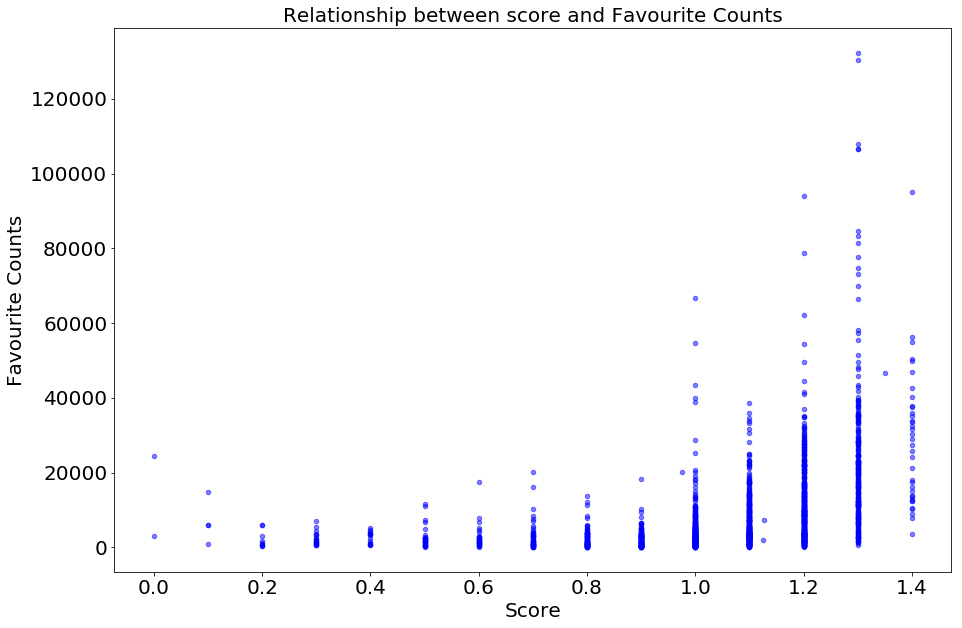

In [77]:
#得分与喜爱数的关系散点图
twitter.plot.scatter(x='score',  y= 'favorite_count', 
                           c='Blue',alpha= 0.5, figsize = (15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Score', fontsize=20)
plt.ylabel('Favourite Counts', fontsize=20)
plt.title('Relationship between score and Favourite Counts',fontsize=20);

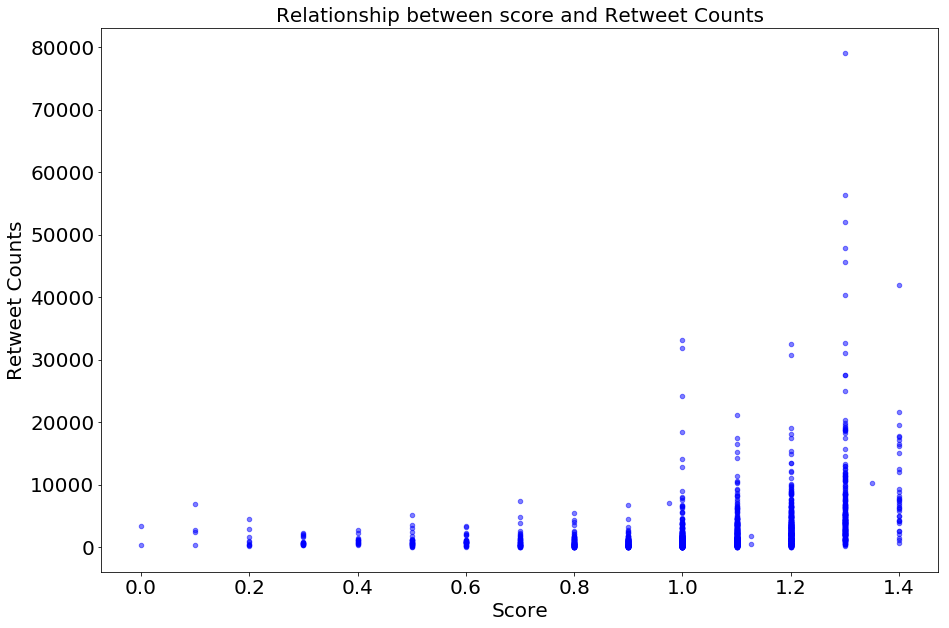

In [78]:
twitter.plot.scatter(x='score', y= 'retweet_count', 
                           c='Blue', alpha= 0.5, figsize = (15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Score', fontsize=20)
plt.ylabel('Retweet Counts', fontsize=20)
plt.title('Relationship between score and Retweet Counts',fontsize=20);

0.9, 1, 1.1, 1.2, 1.3占据了得分总体的大部分，比较均衡，最高的得分1.4分有27只狗狗，根据散点图，我们可以看出，得分1.0以后的狗狗的受喜爱程度以及推特转发数都有明显的提高。

### 4.历年参与评选的狗狗数量

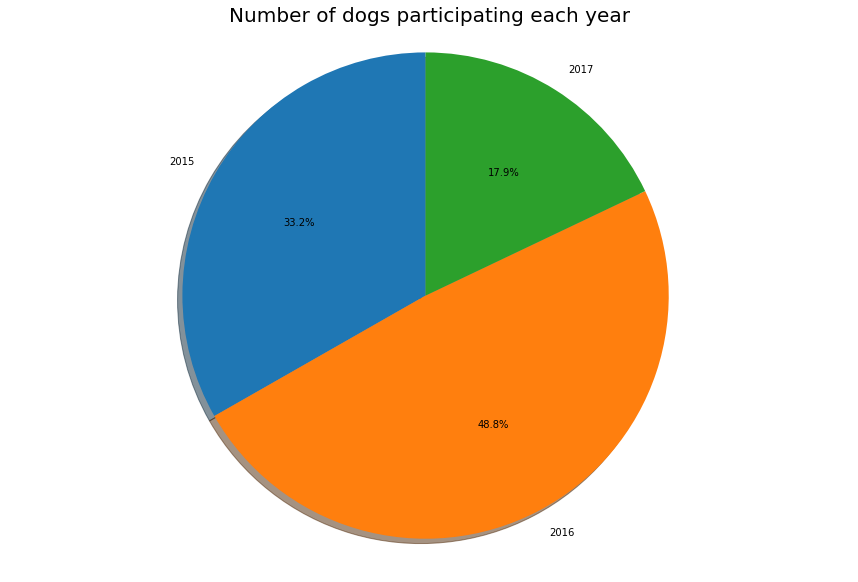

In [79]:
#创建年份列
twitter.timestamp =  pd.to_datetime(twitter.timestamp)
twitter['year'] = twitter.timestamp.dt.year

year_data = twitter.groupby('year').count()['score']

labels = list(year_data.index)
sizes = year_data

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Number of dogs participating each year',fontsize=20)
plt.show();

In [80]:
year_data

year
2015    662
2016    972
2017    357
Name: score, dtype: int64

此处参考官方文档[matplotlib.pyplot.pie](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)，根据年份的划分，2016年参评的狗狗数量是最多的。

### 5.10大最受欢迎的品种

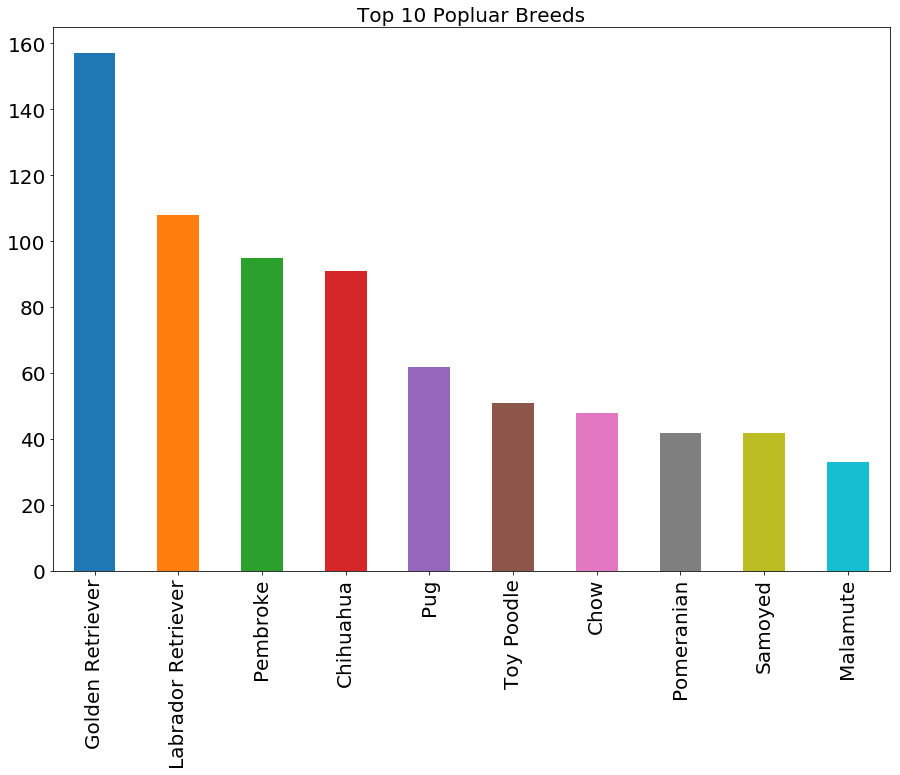

In [81]:
twitter.breed.value_counts()[:10].plot(kind='bar', figsize = (15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 Popluar Breeds',fontsize=20 );

10大最受欢迎的狗狗排名前3的分别是，金毛，拉布拉多以及柯基

### 6.图片数量与可信度均值的关系

我猜想是不是可信度与图片的数量有一定的关系，因此做了以下分析

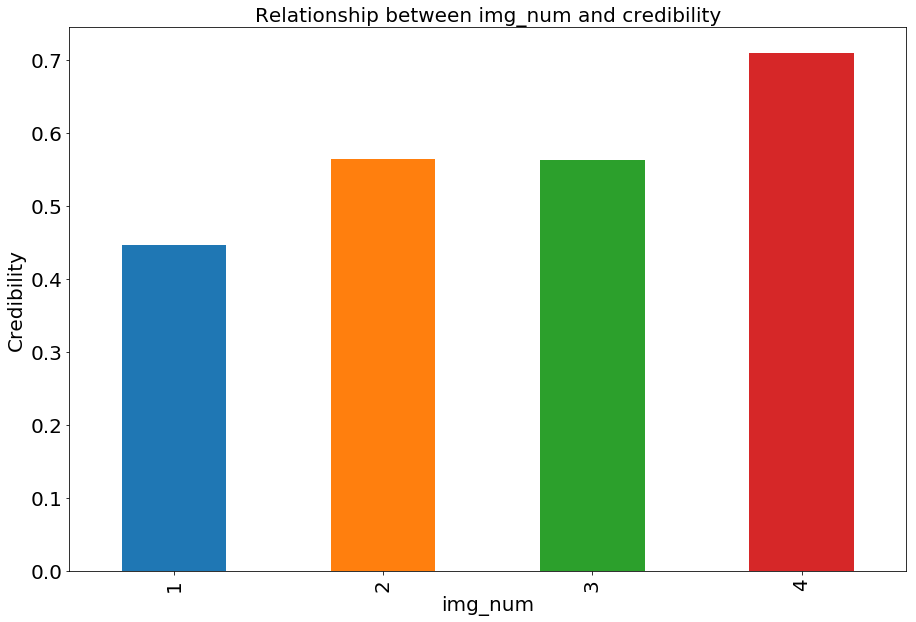

In [82]:
twitter.groupby('img_num')['p_conf'].mean().plot(kind='bar', figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Relationship between img_num and credibility',fontsize=20)
plt.xlabel('img_num',fontsize=20)
plt.ylabel('Credibility',fontsize=20);


根据预测文件，结合图片的个数，得到了图片越多，其预测的可信度可能会越高